In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
data  = pd.read_csv('Iris.csv')
data = data.sample(frac = 1)
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
29,30,4.7,3.2,1.6,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
113,114,5.7,2.5,5.0,2.0,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
133,134,6.3,2.8,5.1,1.5,Iris-virginica


In [86]:
labels = {"Iris-setosa":[1, 0, 0], "Iris-versicolor":[0, 1, 0], "Iris-virginica":[0, 0, 1] }
n = 150
outputs = 3
X = np.array(data.iloc[:,1:5])
temp = np.ones(n)
temp.shape = n, 1
X = np.concatenate((temp,X), axis=1)
Y = []
for cell in np.array(data.iloc[:,5:]):
    Y.append(labels[cell[0]])
Y = np.array(Y)


In [87]:
def cal_label(y):
    for i in range(outputs):
        if(y[i] == 1):
            return i

In [88]:
def softmax(a):
    temp_a = np.exp(a)
#     print("temp_a", temp_a)
    return temp_a/sum(temp_a)

In [89]:
def loss(y_pred, y):
    err = 0
    for i in range(y.shape[0]):
        l = cal_label(y[i])
        err += -np.log(y_pred[i][l])
    return err

In [90]:
def e(i, l):
    if(i == l):
        return 1
    else:
        return 0

In [91]:
def grad(x, y, h):
    l = cal_label(y)
    dh = np.array([-e(i, l)/h[i] for i in range(outputs)])
    da = np.array([-(e(i, l)-h[i]) for i in range(outputs)])
    x.shape = 1, 5
    da.shape = 3, 1
    dw = da@x
    return dw

In [92]:
mean = X.mean(axis=0)
var = X.var(axis=0)
for i in range(n):
    X[i][1:] = np.true_divide((X[i][1:]-mean[1:]), var[1:])

In [93]:
def do_gradient_descent(eta=0.005, max_epochs=1000, eps = 0.00005):
    all_w, all_error = [], []
    weights = np.array([np.random.normal(size=5) for i in range(outputs)]) # four weights for each feature  and one bias
    
    for i in range(max_epochs):
        
        # farward propagation
        y_pred = []
        for x, y in zip(X, Y):
            a = weights@x
            h = softmax(a)
            y_pred.append(h)
        y_pred = np.array(y_pred)
        error = loss(y_pred, Y)/n
        
        # backward propagation
        dw = np.zeros((3, 5))
        for x, y, y_p in zip(X, Y, y_pred):
            dw += grad(x, y, y_p)
            
        # weight updation
        weights = weights - eta*dw
        
        all_w.append(weights)
        all_error.append(error)
        if i>0 and abs(error-all_error[i-1]) < eps:
            print("Broke at epoch ", i+1)
            break

    # plotting graphs
    y_true = [np.argmax(y) for y in Y]
    y_pred = [np.argmax(y) for y in y_pred]
    cp = 0
    icp = 0
    conf_mat = [[0 for i in range(outputs)] for j in range(outputs)]
    for y_t, y_p in zip(y_true, y_pred):
        if y_t == y_p:
            cp += 1
        else:
            icp += 1
        conf_mat[y_t][y_p] += 1
    acc = (cp)*100/(cp+icp)
    print("Accuracy = ", acc)
    
    sns.heatmap(conf_mat , annot=True , xticklabels= labels.keys() , yticklabels=labels.keys())
    plt.title("Confusion Matrix")
    plt.ylabel("Label")
    plt.xlabel("Predicted")
    plt.show()
    
    plt.title("Error Vs No. of epochs")
    plt.xlabel("No. of epochs")
    plt.ylabel("Error")
    plt.plot(np.arange(2, len(all_error)+1), all_error[1:], color="red")
    plt.show()    
    

Broke at epoch  456
Accuracy =  96.66666666666667


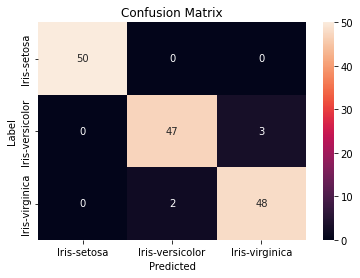

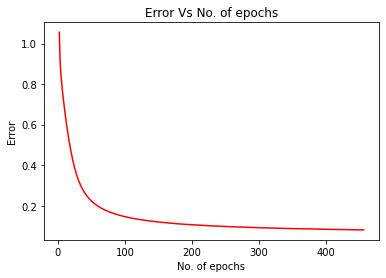

In [94]:
do_gradient_descent()